# # 모듈
---

In [1]:
import pandas as pd
import numpy as np
import json
import glob
import os
import pathlib
import re
import shutil
from sklearn.preprocessing import LabelEncoder
from PIL import Image, ImageDraw, ImageFont

# # 2d_label 에서 2D 박스 좌표 뽑아내기
---

In [ ]:
label_path = '/data/NIA50/data/2-050_sensor_sample/2d_label/'
front_labels = [word for word in os.listdir(label_path) if 'front' in word]
rear_labels = [word for word in os.listdir(label_path) if 'rear' in word]

In [4]:
# 최신 sample
label_path = '/data/NIA50/data/sample/2d_label/'
rear_labels = os.listdir(label_path)

## # front_label
---

In [88]:
df_f2dl = pd.DataFrame(columns = ['x_min', 'y_min', 'x_max', 'y_max', 'id', 'class', 'filename'])

num = 0
for front_label in sorted(front_labels)[1:]:
    with open(label_path+front_label, 'rb') as f:
        front_js = json.load(f)
    
    for obj in front_js['objects']:
        
        x_point = []
        y_point = []
        for points in obj['front']:
            x_point.append(points['x'])
            y_point.append(points['y'])
            
        for points in obj['back']:
            x_point.append(points['x'])
            y_point.append(points['y'])
            
        x_min = min(x_point) / 1.6
        if x_min < 0: x_min = 0
        
        y_min = min(y_point) / 1.6
        if y_min < 0: y_min = 0
        
        x_max = max(x_point) / 1.6
        if x_max > 1280: x_max = 1280
        
        y_max = max(y_point) / 1.6
        if y_max > 960: y_max = 960
        
        id_ = obj['id']
        class_ = obj['class']
        filename = front_js['filename'][:-4]
        
        data = [x_min, y_min, x_max, y_max, id_, class_, filename]

        df_f2dl.loc[num] = data
        
        num+=1
        
df_f2dl['class'] = df_f2dl['class'].str.lower()
df_f2dl.loc[(df_f2dl['class'] == 'box-svg-selected') | (df_f2dl['class'] == 'medium_truck'), 'class'] = 'truck'
df_f2dl.loc[(df_f2dl['class'] == 'adult'), 'class'] = 'person'
df_f2dl.loc[(df_f2dl['class'] == 'suv'), 'class'] = 'car'
# df_f2dl['class'] = df_f2dl['class'].apply(lambda x: x.capitalize())
# df_f2dl['label'] = LabelEncoder().fit_transform(df_f2dl['class'])
df_f2dl.loc[df_f2dl['class'] == 'person', 'label'] = 0
df_f2dl.loc[df_f2dl['class'] == 'car', 'label'] = 2
df_f2dl.loc[df_f2dl['class'] == 'bus', 'label'] = 5
df_f2dl.loc[df_f2dl['class'] == 'truck', 'label'] = 7
df_f2dl['label'] = df_f2dl['label'].astype('int')

df_f2dl

,x_min,y_min,x_max,y_max,id,class,filename,label
0,346.250,485.000,468.125,552.500,20,truck,1639543825.777566671,7
1,608.125,500.625,810.000,567.500,17,truck,1639543825.777566671,7
2,351.250,530.000,395.625,557.500,16,car,1639543825.777566671,2
3,268.125,524.375,361.250,563.125,15,truck,1639543825.777566671,7
4,933.750,500.625,1176.875,568.125,18,bus,1639543825.777566671,5
...,...,...,...,...,...,...,...,...
1054,40.625,508.750,192.500,612.500,4,truck,1639543835.676477671,7
1055,0.000,516.875,78.750,582.500,5,car,1639543835.676477671,2
1056,225.000,495.625,400.000,571.250,6,truck,1639543835.676477671,7
1057,1370.000,536.875,1280.000,750.625,8,car,1639543835.676477671,2


In [39]:
print(df_f2dl['class'].unique())
print(df_f2dl['label'].unique())

['truck' 'car' 'bus' 'person']
[7 2 5 0]


## # raer_label
---


In [7]:
df_r2dl = pd.DataFrame(columns = ['x_min', 'y_min', 'x_max', 'y_max', 'id', 'class', 'filename'])

num = 0
for rear_label in sorted(rear_labels)[1:]:
    with open(label_path+rear_label, 'rb') as f:
        rear_js = json.load(f)
    
    for obj in rear_js['objects']:
        
        x_point = []
        y_point = []
        for points in obj['front']:
            x_point.append(points['x'])
            y_point.append(points['y'])
            
        for points in obj['back']:
            x_point.append(points['x'])
            y_point.append(points['y'])
            
        x_min = min(x_point) / 1.6
        if x_min < 0: x_min = 0
        
        y_min = min(y_point) / 1.6
        if y_min < 0: y_min = 0
        
        x_max = max(x_point) / 1.6
        if x_max > 1280: x_max = 1280
        
        y_max = max(y_point) / 1.6
        if y_max > 960: y_max = 960
        
        id_ = obj['id']
        class_ = obj['class']
        filename = rear_js['filename'][:-4]
        
        data = [x_min, y_min, x_max, y_max, id_, class_, filename]

        df_r2dl.loc[num] = data
        
        num+=1

df_r2dl

,x_min,y_min,x_max,y_max,id,class,filename
0,185.000,545.000,454.375,688.750,5,Car,1639550110.329685450
1,360.625,543.750,499.375,628.750,4,Small_Car,1639550110.329685450
2,441.875,540.000,555.000,609.375,3,SUV,1639550110.329685450
3,541.250,551.875,565.000,590.000,2,Car,1639550110.329685450
4,171.875,545.000,453.750,689.375,5,Car,1639550110.428467751
...,...,...,...,...,...,...,...
391,540.625,560.000,576.250,598.750,2,Car,1639550120.027633667
392,164.375,544.375,455.625,689.375,5,Car,1639550120.124609947
393,365.000,544.375,501.250,628.125,4,Small_Car,1639550120.124609947
394,445.000,537.500,548.750,606.250,3,SUV,1639550120.124609947


In [9]:
print(df_r2dl['class'].unique())
# print(df_r2dl['label'].unique())

['Car' 'Small_Car' 'SUV']


# # yolov5용 label 만들기
---

In [10]:
def kitti_to_yolo(label, x1, y1, x2, y2, image_w, image_h): # x1=x_min, y1=y_min, x2=x_max, y2=y_max
    return [label, ((x2 + x1)/(2*image_w)), ((y2 + y1)/(2*image_h)), (x2 - x1)/image_w, (y2 - y1)/image_h]

In [11]:
for filename in df_f2dl['filename'].unique():

    df_lb = pd.DataFrame(columns = ['class', 'x', 'y', 'width', 'height'])
    for i, j in enumerate(df_f2dl.loc[df_f2dl['filename'] == filename].index):
        tmp = df_f2dl.iloc[j]
        label_data = kitti_to_yolo(tmp['label'], tmp['x_min'], tmp['y_min'], tmp['x_max'], tmp['y_max'], 1280, 960)
        
        df_lb.loc[i] = label_data
        df_lb['class'] = df_lb['class'].astype('int')
        
    df_lb = df_lb.loc[df_lb['width'] > 0]
    df_lb = df_lb.loc[df_lb['height'] > 0]
    df_lb.to_csv(f'/data/NIA50/data/2-050_sensor_sample/camera/front/labels/{filename}.txt', index = None, header = None, sep = ' ')

NameError: name 'df_f2dl' is not defined

# # 2D 라벨링 시각화
---

In [274]:
len(front_labels)

101

In [8]:
a = os.listdir('/data/project50/2-050_sensor_sample/camera/front')
b = [i[:-4] for i in a]
len(b)

100

In [284]:
# json 내부 filename 이상

for i in b:
    if i not in df_f2dl['filename'].unique():
        print(i)

1639543830.576124191


In [288]:
b.index('1639543830.576124191')

57

In [54]:
df_f2dl['filename'].unique()[2]

'1639543825.978711843'

## # front
---

In [ ]:
from PIL import Image, ImageDraw, ImageFont

font_size = 15
color = (0, 255, 0)

for j in df_f2dl['filename'].unique()[:1]:
    img = f'/data/NIA50/data/2-050_sensor_sample/camera/front/images/{j}.jpg'
    img_ = Image.open(img).convert('RGB')
    
    temp = df_f2dl.loc[df_f2dl['filename'] == j]
    for i in temp.index:
        data = temp.loc[i]
        
        # color = tuple(np.random.choice(255, 3))
        font = ImageFont.truetype('/data/NIA50/kimgh/fonts/arial.ttf', 18) # arial.ttf 글씨체, font_size=15
        # font = ImageFont.load_default()
        # box_color_RGBA  = (0,255,0,255)
        # fill_color_RGBA = (0,255,0,50)
        # draw = ImageDraw.Draw(img_, 'RGBA') # RGBA
        # draw.rectangle((100,100,300,300), outline=box_color_RGBA, fill=fill_color_RGBA, width = 3)
        # img_.show()

        draw = ImageDraw.Draw(img_)
        text_pos = (data[0], data[1]-23)
        draw.text(text_pos, f"{data['id'], data['class']}", fill = color, font = font, stroke_width = 1)
        draw.rectangle(list(data[:4]), outline = color, width = 3)
    
    print('filename :', j)    
    img_.show()

## # rear
---

In [ ]:
from PIL import Image, ImageDraw, ImageFont

font_size = 15
color = (0, 255, 0)

for j in df_r2dl['filename'].unique()[90:101]:
    img = f'/data/NIA50/data/sample/camera/rear/{j}.jpg'
    img_ = Image.open(img).convert('RGB')
    
    temp = df_r2dl.loc[df_r2dl['filename'] == j]
    for i in temp.index:
        data = temp.loc[i]
        
        # color = tuple(np.random.choice(255, 3))
        font = ImageFont.truetype('/data/NIA50/kimgh/fonts/arial.ttf', 18) # arial.ttf 글씨체, font_size=15
        # font = ImageFont.load_default()
        # box_color_RGBA  = (0,255,0,255)
        # fill_color_RGBA = (0,255,0,50)
        # draw = ImageDraw.Draw(img_, 'RGBA') # RGBA
        # draw.rectangle((100,100,300,300), outline=box_color_RGBA, fill=fill_color_RGBA, width = 3)
        # img_.show()

        draw = ImageDraw.Draw(img_)
        text_pos = (data[0], data[1]-23)
        draw.text(text_pos, f"{data['id'], data['class']}", fill = color, font = font, stroke_width = 1)
        draw.rectangle(list(data[:4]), outline = color, width = 3)
        
    print('filename :', j)    
    img_.show()

# # 48번 데이터
---

In [25]:
path = '/data/NIA50/data/Avante_Clips/'
avante_clip = []
for i in os.listdir(path):
    clip = os.listdir(path+i)
    avante_clip+=clip
    
sorted(avante_clip)

['A_Clip_00057_01',
 'A_Clip_00066_07',
 'A_Clip_00075_07',
 'A_Clip_00180_01',
 'A_Clip_00191_01',
 'A_Clip_00194_01',
 'A_Clip_00236_06',
 'A_Clip_00238_06',
 'A_Clip_00261_01',
 'A_Clip_00275_01',
 'A_Clip_00276_05',
 'A_Clip_00342_05',
 'A_Clip_00355_05',
 'A_Clip_00392_01',
 'A_Clip_05224_01',
 'A_Clip_05231_01',
 'A_Clip_05232_01',
 'A_Clip_05233_01',
 'A_Clip_05237_01',
 'A_Clip_05247_03',
 'A_Clip_05251_03',
 'A_Clip_05310_01',
 'A_Clip_05314_01',
 'A_Clip_05351_01',
 'A_Clip_05355_01',
 'A_Clip_05363_01',
 'A_Clip_05364_01',
 'A_Clip_05371_01',
 'A_Clip_05373_01',
 'A_Clip_05374_01',
 'A_Clip_05377_01',
 'A_Clip_05403_01',
 'A_Clip_05404_01',
 'A_Clip_05406_07',
 'A_Clip_05408_01',
 'A_Clip_05409_07',
 'A_Clip_05411_07',
 'A_Clip_05412_07',
 'A_Clip_05413_07',
 'A_Clip_05415_05',
 'A_Clip_05416_07',
 'A_Clip_05420_01',
 'A_Clip_05421_01',
 'A_Clip_05422_07',
 'A_Clip_05423_07',
 'A_Clip_05424_07',
 'A_Clip_05425_07',
 'A_Clip_05429_01',
 'A_Clip_05441_01',
 'A_Clip_05442_01',


In [135]:
# 라벨 복사

import glob
import shutil

all_path = glob.glob('/data/NIA50/data/aivill-48/*/*/label')

avante_labels = []
for path in all_path:
    for i in os.listdir(path):
        if 'A_Clip' in i:
            # print(path + '/' + i)
            shutil.copytree(path + '/' + i + '/result', '/data/NIA50/data/yolo_aivill48/' + i, dirs_exist_ok=True)
            avante_labels.append(i)
            

In [136]:
# 이미지 복사

import os
import shutil


path = '/data/NIA50/data/yolo_aivill48/'

for i in avante_labels:
    os.makedirs(path+i, exist_ok=True)
 
    
all_path = '/data/NIA50/data/Avante_Clips/*/*'

paths = []
for i in glob.glob(all_path):
    for j in avante_labels:
        if j in i:
            paths.append(i)
            

# 폴더 생성
for path in paths:
    shutil.copytree(path + '/Camera/CameraFront/blur', '/data/NIA50/data/yolo_aivill48/' + path[-15:], dirs_exist_ok=True)

## # yolo에 맞춰 라벨링
---

In [6]:
def xywh2xyxy(x):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    x = np.array(x).reshape(1, -1)
    y = np.copy(x)
    y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
    y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
    y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
    y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
    y = list(y.reshape(-1))
    return y


def xyxy2xywhn(x, w=1920, h=1200, clip=False, eps=0.0):
    # Convert nx4 boxes from [x1, y1, x2, y2] to [x, y, w, h] normalized where xy1=top-left, xy2=bottom-right
    if clip:
        clip_boxes(x, (h - eps, w - eps))  # warning: inplace clip
    x = np.array(x).reshape(1, -1)
    y = np.copy(x)
    y[:, 0] = ((x[:, 0] + x[:, 2]) / 2) / w  # x center
    y[:, 1] = ((x[:, 1] + x[:, 3]) / 2) / h  # y center
    y[:, 2] = (x[:, 2] - x[:, 0]) / w  # width
    y[:, 3] = (x[:, 3] - x[:, 1]) / h  # height
    y = list(y.reshape(-1))
    return y

In [97]:
import json
import re

class_ = {'BICYCLE': 0, 'BUS': 1, 'CAR': 2, 'ETC': 3, 'PEDESTRIAN': 4, 'TRUCK': 5, 'MOTORCYCLE': 6}

labels = glob.glob('/data/NIA50/data/yolo_aivill48/*/*.json')

for label in labels:                     
    with open (label, 'r') as f:
        label_js = json.load(f)
        name = re.sub('FC', 'CF', label[-23:-5])
        f.close()
        
        with open ('/data/NIA50/data/yolo_aivill48/labels/' + name + '.txt', 'w') as f:
            
            for i in np.arange(len(label_js['annotation'])):
                category = label_js['annotation'][i]['category']
                xywh = label_js['annotation'][i]['3d_box'][0]['2d_box']
                
                f.write(f"{class_[category]} {xywh[0]/1920} {xywh[1]/1200} {xywh[2]/1920} {xywh[3]/1200}\n")

            f.close()

In [91]:
temp = []
for label in labels:                     
    with open (label, 'r') as f:
        label_js = json.load(f)
        name = re.sub('FC', 'CF', label[-23:-5])
        
        for i in np.arange(len(label_js['annotation'])):
            category = label_js['annotation'][i]['category']
            temp.append(category)

In [89]:
images = glob.glob('/data/NIA50/data/yolo_aivill48/*/*.png')

for image in images:
    shutil.copy(image, '/data/NIA50/data/yolo_aivill48/images')

## # yaml용 train, val 세트 나누기
---

In [90]:
import glob
from sklearn.model_selection import train_test_split

img_list = sorted(glob.glob('/data/NIA50/data/yolo_aivill48/images/*.png'))

train_list, val_list = train_test_split(img_list, test_size = 0.2, random_state = 0)

with open('/data/NIA50/data/yolo_aivill48/train.txt', 'w') as f:
    f.write('\n'.join(train_list) + '\n')
    
with open('/data/NIA50/data/yolo_aivill48/val.txt', 'w') as f:
    f.write('\n'.join(val_list) + '\n')

In [98]:
os.listdir('/data/NIA50/yolov5/runs/train')

['yolo_avill482', 'yolo_avill48', 'yolov5x_results7', 'yolov5x_results10']

# # 특수환경 자율주행 3D 이미지
---

In [34]:
val_df = pd.read_csv('/data/NIA50/data/특수환경 자율주행 3D 이미지/val_df.csv')
val_df['frame'] = val_df['frame'].apply(lambda x: str(x).zfill(6))
tdf = val_df.loc[val_df['xyzlwh']!='[0.0, 0.0, 0.0, 0, 0, 0]']
tdf.head()

,clip,frame,xyxy,xyzlwh,theta,eulerangle,translation,fxfycxcy,k1k2p1p2,class,type
19,drive_1151,000019,"[-5, 631, 231, 830]","[-5.18, -6.52, -1.04, 4.44, 1.76, 1.81]",0.0,"[-6.308843, -0.01, 0.0]","[0.02, -0.02, -0.03]","[1067.249617, 1070.402406, 967.123811, 600.618...","[-0.156654, 0.10625, 0.0, 0.0]",VEHICLE,SEDAN
20,drive_1151,000020,"[0, 614, 280, 837]","[-5.73, -6.67, -1.03, 4.44, 1.75, 1.8]",0.0,"[-6.308843, -0.01, 0.0]","[0.02, -0.02, -0.03]","[1067.249617, 1070.402406, 967.123811, 600.618...","[-0.156654, 0.10625, 0.0, 0.0]",VEHICLE,SEDAN
21,drive_1151,000021,"[-8, 604, 314, 845]","[-6.36, -6.66, -1.02, 4.44, 1.75, 1.79]",0.0,"[-6.308843, -0.01, 0.0]","[0.02, -0.02, -0.03]","[1067.249617, 1070.402406, 967.123811, 600.618...","[-0.156654, 0.10625, 0.0, 0.0]",VEHICLE,SEDAN
22,drive_1151,000022,"[-2, 607, 352, 858]","[-6.92, -6.65, -1.01, 4.44, 1.75, 1.78]",0.0,"[-6.308843, -0.01, 0.0]","[0.02, -0.02, -0.03]","[1067.249617, 1070.402406, 967.123811, 600.618...","[-0.156654, 0.10625, 0.0, 0.0]",VEHICLE,SEDAN
23,drive_1151,000023,"[-3, 606, 390, 843]","[-7.55, -6.64, -1.0, 4.44, 1.75, 1.77]",0.0,"[-6.308843, -0.01, 0.0]","[0.02, -0.02, -0.03]","[1067.249617, 1070.402406, 967.123811, 600.618...","[-0.156654, 0.10625, 0.0, 0.0]",VEHICLE,SEDAN


In [37]:
tdf.loc[tdf['type'] == 'UNKNOWN', ['class', 'type']]['class'].unique()

array(['VEHICLE', 'BICYCLE'], dtype=object)

In [38]:
tdf.loc[tdf['type'] == 'ETC', ['class', 'type']]['class'].unique()

array(['VEHICLE'], dtype=object)

In [35]:
tdf['type'].unique()

array(['SEDAN', 'UNKNOWN', 'SUV', 'TRUCK', 'BUS', 'AUTO_BICYCLE', 'ETC',
       'BICYCLE', 'ADULT', 'CHILD'], dtype=object)

In [7]:
t_df = val_df.loc[val_df['xyzlwh']!='[0.0, 0.0, 0.0, 0, 0, 0]']

In [16]:
temp = t_df.loc[t_df['xyxy'].apply(lambda x: '-' in x)]

In [23]:
tt = json.loads(temp['xyxy'].values[0])

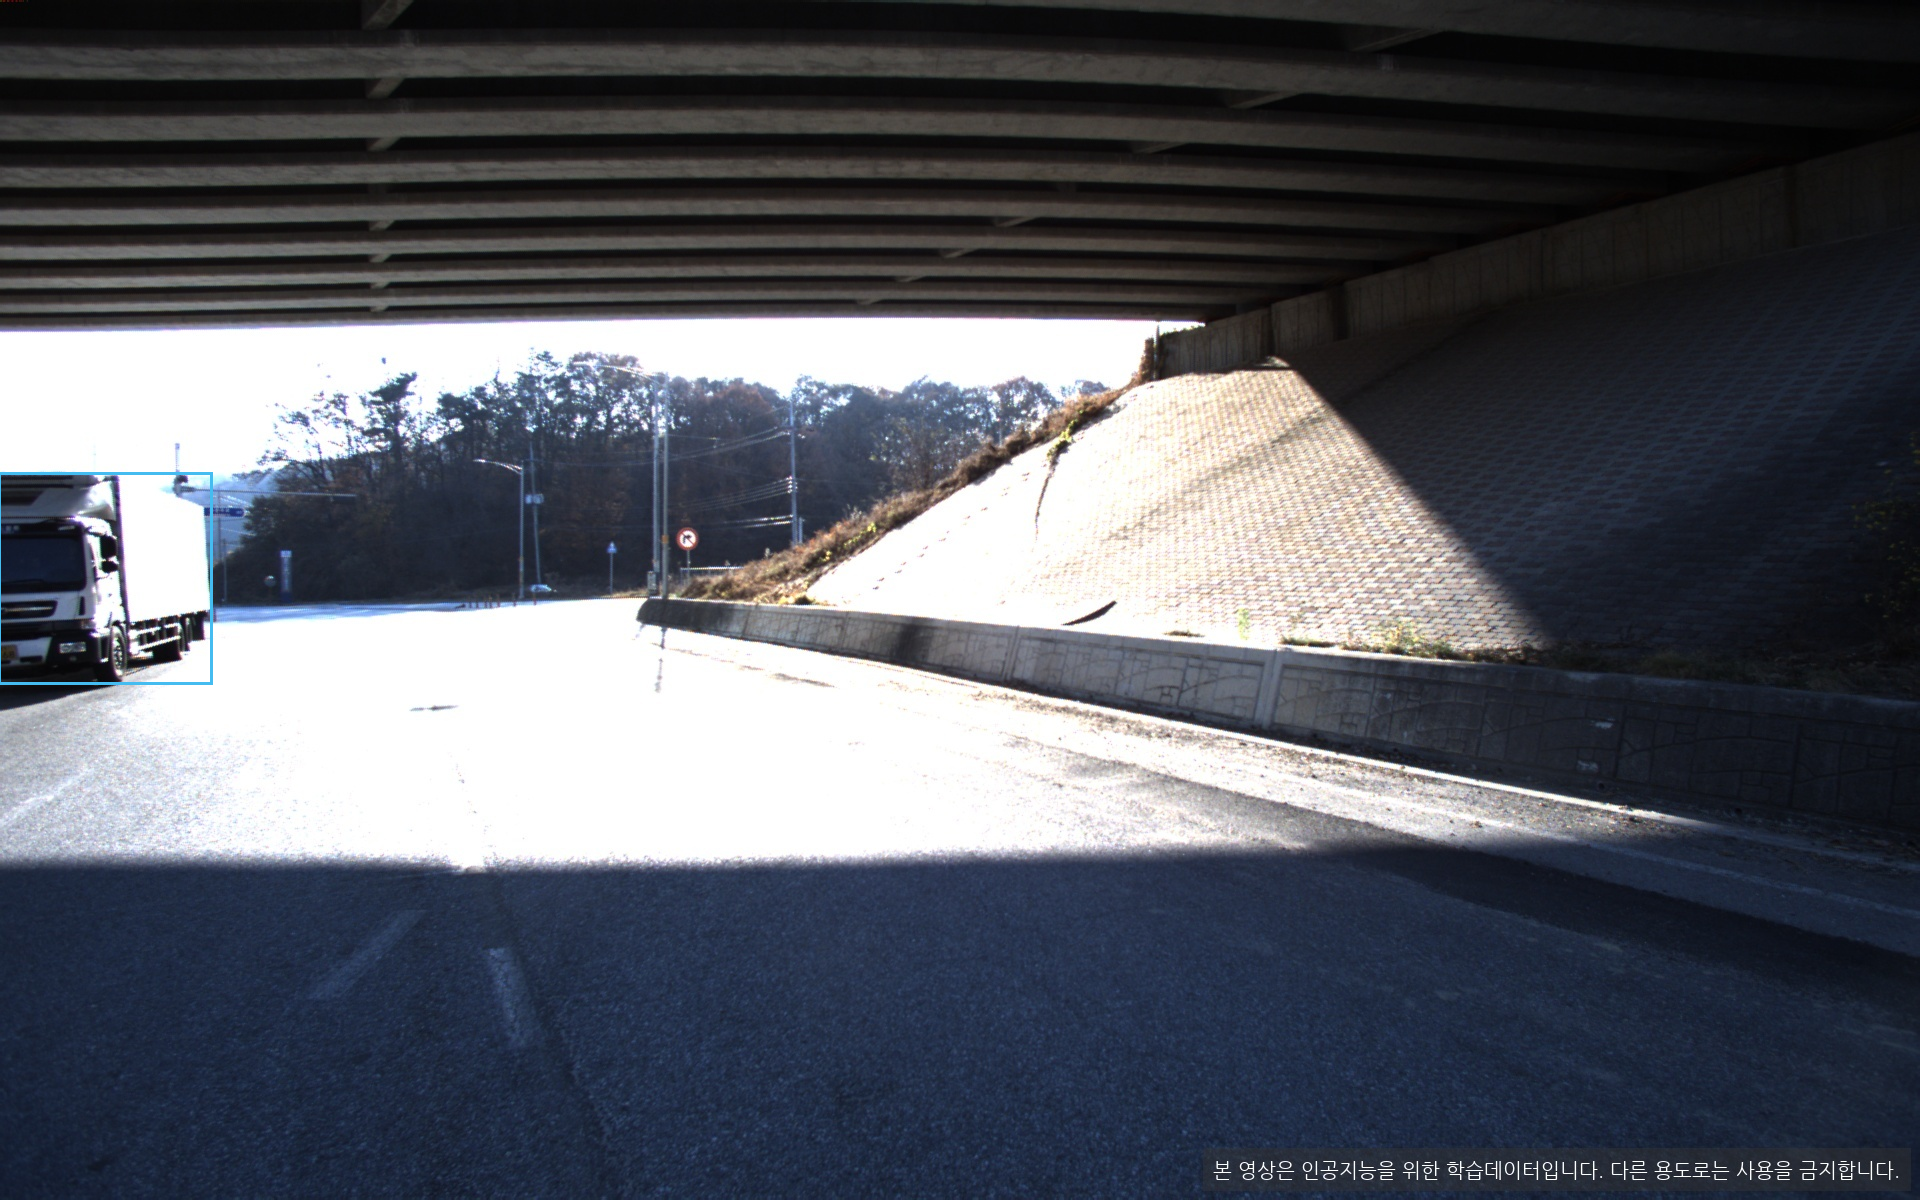

In [17]:
img_ = Image.open('/data/NIA50/data/특수환경 자율주행 3D 이미지/Validation/003/1/drive_0009/image_0/daejeon_003_1_drive_0009_00000034.jpg').convert('RGB')


color = tuple(np.random.choice(255, 3))
font = ImageFont.truetype('/data/NIA50/kimgh/fonts/arial.ttf', 18) # arial.ttf 글씨체, font_size=15
# font = ImageFont.load_default()
# box_color_RGBA  = (0,255,0,255)
# fill_color_RGBA = (0,255,0,50)
# draw = ImageDraw.Draw(img_, 'RGBA') # RGBA
# draw.rectangle((100,100,300,300), outline=box_color_RGBA, fill=fill_color_RGBA, width = 3)
# img_.show()

draw = ImageDraw.Draw(img_)
# text_pos = (data[0], data[1]-23)
# draw.text(text_pos, f"{data['id'], data['class']}", fill = color, font = font, stroke_width = 1)
draw.rectangle(js['OBJECT_LIST'][0]['3D_LIST'][0]['BOX'], outline = color, width = 3)
img_
